In [2]:
import cv2
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
file_data_b_csv=r'/home/jacobo15defrutos/AVS9/5-Pruebas/total_imgs.csv'
df= pd.read_csv(file_data_b_csv)
df_train, df_test = train_test_split(df, test_size=0.2,random_state=42)
print("Train shape: ",df_train.shape)
print("Test shape: ",df_test.shape)

Train shape:  (228, 2)
Test shape:  (57, 2)


In [4]:
labels_train= df_train['Label']
train_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    train_list.append(img)
    print(name)
train= np.array(train_list)

781208_OI_SUP_SANO.jpg
9810998_OD_INF_SANO.jpg
795004_OD_INF_SANO.jpg
781208_OI_NAS_SANO.jpg
9108332_OD_INF_SURV_aug.png
9301219_OI_NAS_CMV.jpg
299195_OD_TEM_SURV_aug.png
8904001_OI_SUP_SANO.jpg
9533836_OI_NAS_CMV.jpg
9108332_OD_INF_SURV.jpg
9952305_OD_SUP_SURV_aug.png
331281_OD_TEM_CMV.jpg
331281_OD_NAS_CMV.jpg
9453167_OD_INF_CMV_aug.png
9749053_OD_INF_SANO.jpg
394104_OI_INF_SURV_aug.png
2581150_OD_SUP_CMV.jpg
9577792_OD_INF_SANO.jpg
9533836_OI_INF_CMV.jpg
9494783_OI_INF_CMV_aug.png
9764955_OD_SUP_SURV_aug.png
2581150_OI_SUP_SANO.jpg
9453167_OI_NAS_SANO.jpg
9455268_OD_NAS_CMV_aug.png
9577792_OD_TEM_SANO.jpg
449702_OI_SUP_CMV_aug.png
9453167_OD_INF_CMV.jpg
428663_OI_TEM_CMV_aug.png
110160_OI_SUP_SURV.jpg
394104_OI_SUP_SURV_aug.png
742291_OD_SUP_SANO.jpg
9764955_OD_TEM_SURV.jpg
9301219_OI_TEM_CMV.jpg
739156_OD_SUP_SURV.jpg
742291_OI_SUP_CMV.jpg
9381742_OD_NAS_SANO.jpg
9400239_OD_NAS_SURV.jpg
9301219_OI_SUP_CMV.jpg
9533836_OI_INF_CMV_aug.png
9764955_OI_TEM_SANO.jpg
9545911_OI_INF_SANO.jp

In [5]:
train.shape
train[0].shape
train_fft= np.fft.fftshift(np.fft.fft2(train[0]))
train_fft.shape

(224, 224)

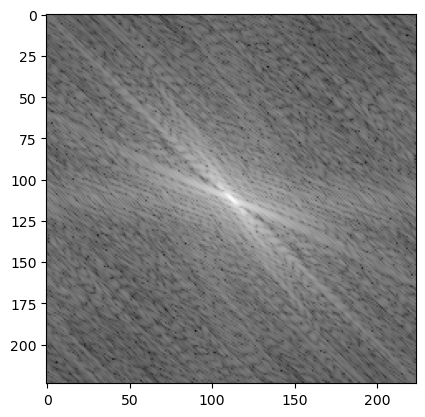

In [6]:
plt.imshow(np.log(abs(train_fft)), cmap='gray')

array([[117, 118, 105, ...,  91, 105, 118],
       [117, 115, 119, ...,  72,  88, 101],
       [108, 115, 111, ..., 103,  92,  94],
       ...,
       [102, 108, 109, ..., 111, 116, 113],
       [108,  94,  92, ..., 119, 111, 115],
       [117, 101,  88, ..., 115, 119, 115]], dtype=uint8)

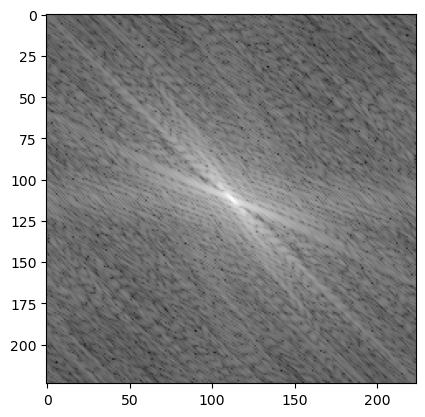

In [7]:
a=np.log(abs(train_fft))
b = cv2.normalize(a, None, 0, 255, cv2.NORM_MINMAX)
c= np.uint8(b)
plt.imshow(c, cmap='gray')
c